In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv("/content/Reviews.csv", quotechar='"')


In [13]:
df2=df.copy()
df.head(1000)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
995,996,B006F2NYI2,A1D3F6UI1RTXO0,Swopes,1,1,5,1331856000,Hot & Flavorful,BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...
996,997,B006F2NYI2,AF50D40Y85TV3,Mike A.,1,1,5,1328140800,Great Hot Sauce and people who run it!,"Man what can i say, this salsa is the bomb!! i..."
997,998,B006F2NYI2,A3G313KLWDG3PW,kefka82,1,1,5,1324252800,this sauce is the shiznit,this sauce is so good with just about anything...
998,999,B006F2NYI2,A3NIDDT7E7JIFW,V. B. Brookshaw,1,2,1,1336089600,Not Hot,Not hot at all. Like the other low star review...


In [14]:
df.shape

(568454, 10)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [16]:
df['Text']

,Text
0,I have bought several of the Vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...
...,...
568449,Great for sesame chicken..this is a good if no...
568450,I'm disappointed with the flavor. The chocolat...
568451,"These stars are small, so you can give 10-15 o..."
568452,These are the BEST treats for training and rew...


In [17]:
df.drop(['Id','ProductId','UserId','ProfileName','HelpfulnessDenominator','HelpfulnessNumerator','Time',
        'Summary'],axis=1,inplace=True)

In [18]:
df.columns

Index(['Score', 'Text'], dtype='object')

In [19]:
df.isna().sum()

,0
Score,0
Text,0


In [20]:
df.duplicated().sum()

174779

In [21]:
df.drop_duplicates(inplace=True)

In [22]:
df.shape

(393675, 2)

In [23]:
df['Score'].nunique()

5

In [24]:
df['Score'].unique()

array([5, 1, 4, 2, 3])

In [25]:
df['Score'].value_counts()/len(df)*100

,count
Score,
5,63.693402
4,14.243729
1,9.215724
3,7.562583
2,5.284562


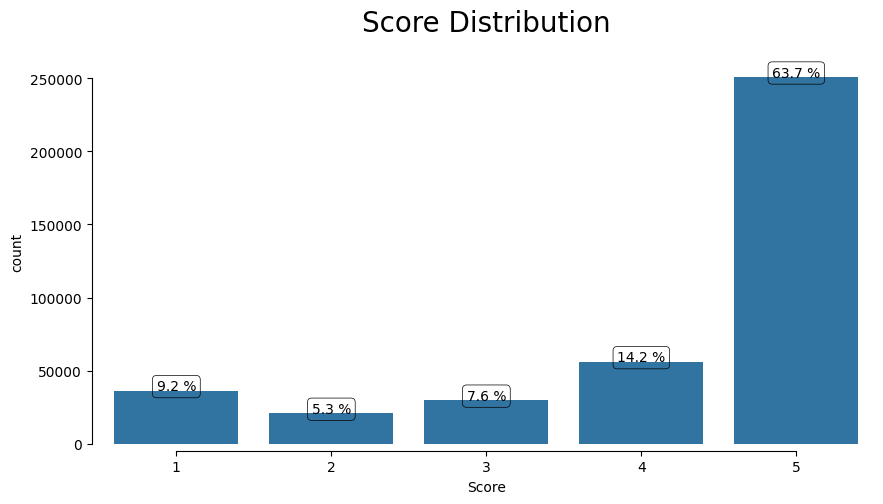

In [26]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x=df['Score'])
total=float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 75,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
ax.set_title('Score Distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

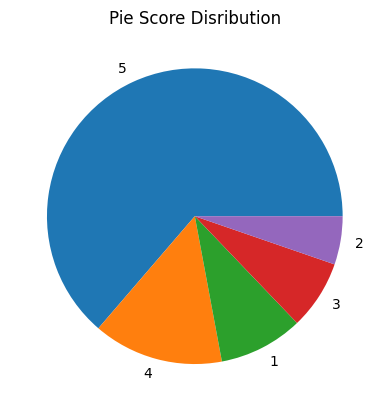

In [27]:
score_values=df['Score'].value_counts()
plt.pie(score_values,labels=score_values.index)
plt.title('Pie Score Disribution')
plt.show()

In [28]:
new_df= df.groupby('Score').apply(lambda x: x.sample(10000)).reset_index(drop=True)

In [29]:
new_df

,Score,Text
0,1,I bought and installed two of these traps 8 da...
1,1,"I was looking forward to this product, as my w..."
2,1,Since this type of yeast is no longer availabl...
3,1,Let me be clear: I wasn't expecting this to ta...
4,1,"I'm a big fan of Twinings, so when I saw that ..."
...,...,...
49995,5,"I had never tried 5-Hour Energy before, but ha..."
49996,5,Delicious organic tomato soup. All of ours wer...
49997,5,I couldn't count the number of bottles of Pick...
49998,5,You open the packaging and immediately smell d...


In [30]:
new_df.shape

(50000, 2)

In [31]:
new_df['Score'].value_counts()

,count
Score,
1,10000
2,10000
3,10000
4,10000
5,10000


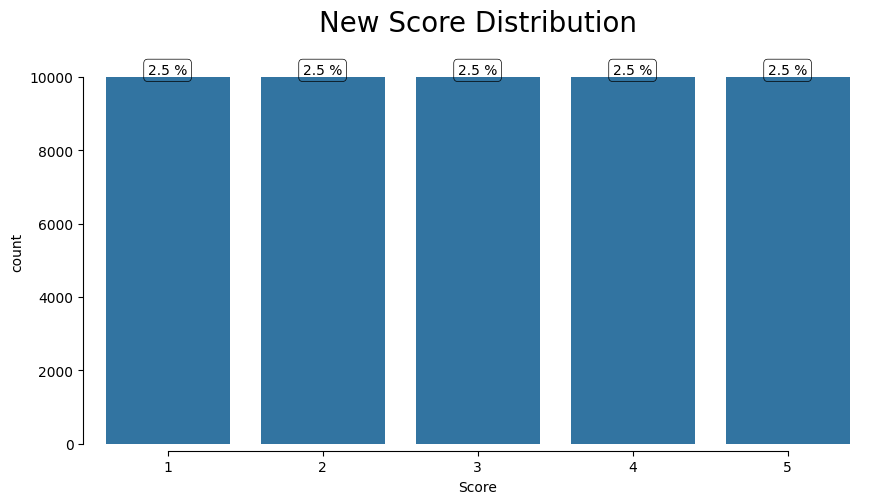

In [32]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x=new_df['Score'])
total=float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 75,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
ax.set_title('New Score Distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

In [33]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [34]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [35]:
stop_words=set(stopwords.words('english'))
#lemmatization=WordNetLemmatizer()
stemming=PorterStemmer()

In [36]:
def clean_text(text):
    # 1. Convert to lower
    txt=text.lower()

    # 1. split to words
    tokens=word_tokenize(text)

    # 3. remove punctuation
    tokens=[word for word in tokens if word not in string.punctuation]

    # 4. Remove stopwords
    tokens=[word for word in tokens if word not in stop_words]

    # 5. Remove numbers
    tokens=[word for word in tokens if not word.isdigit()]

    # 6. Apply Stemming
    tokens=[stemming.stem(word) for word in tokens]# To return these single words back into one string
    return ' '.join(tokens)

In [38]:
 import nltk
 nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [39]:
new_df['cleaned_text'] = new_df['Text'].apply(clean_text)

In [40]:
new_df

,Score,Text,cleaned_text
0,1,I bought and installed two of these traps 8 da...,i bought instal two trap day ago let report re...
1,1,"I was looking forward to this product, as my w...",i look forward product wife i like earl grey t...
2,1,Since this type of yeast is no longer availabl...,sinc type yeast longer avail local groceri sto...
3,1,Let me be clear: I wasn't expecting this to ta...,let clear i n't expect tast like top-shelf mar...
4,1,"I'm a big fan of Twinings, so when I saw that ...",i 'm big fan twine i saw sold green tea i jump...
...,...,...,...
49995,5,"I had never tried 5-Hour Energy before, but ha...",i never tri 5-hour energi heard good thing i r...
49996,5,Delicious organic tomato soup. All of ours wer...,delici organ tomato soup all half soup half no...
49997,5,I couldn't count the number of bottles of Pick...,i could n't count number bottl pickapeppa orig...
49998,5,You open the packaging and immediately smell d...,you open packag immedi smell delici fresh bake...


In [42]:
!pip install wordcloud

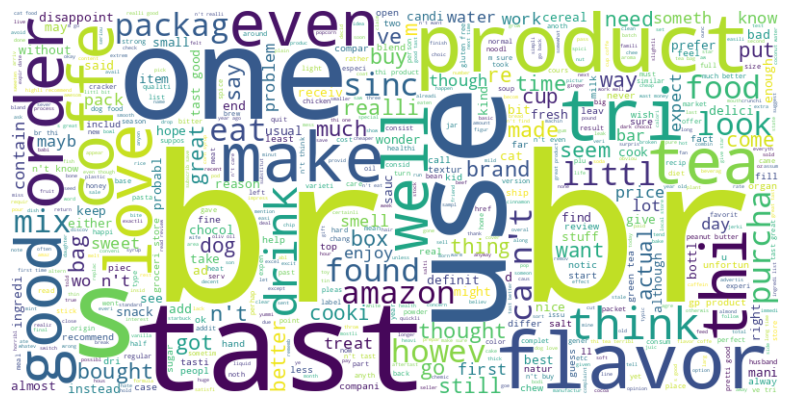

In [43]:
from wordcloud import WordCloud
# Combine all cleaned text into a single string
all_text=' '.join(new_df['cleaned_text'])



# Create the WordCloud object with the top 1000 words
wordcloud = WordCloud(width=800, height=400, max_words=1000, background_color='white').generate(all_text)

# Plot the WordCloud using matplotlib
plt.figure(figsize=(10, 5))  # Set figure size
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

In [44]:
len(set(all_text))

69

In [45]:
len(all_text)

14413644

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForest
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [47]:
new_df['Score'] = new_df['Score'].apply(lambda x: 1 if x >=3 else 0)

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X=new_df['cleaned_text']
y=new_df['Score']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42,test_size = 0.20)

Logistic regression


In [51]:
logistic_pipe=Pipeline(
    [
      ('vec',CountVectorizer(stop_words= "english")),
        ('Tf_idf',TfidfTransformer()),
        ('log_rg',LogisticRegression()),

    ]
)

In [52]:
log_fit = logistic_pipe.fit(X_train,y_train)


In [53]:
log_pred=logistic_pipe.predict(X_test)

In [54]:
print('Training accuracy:', log_fit.score(X_train,y_train))
print('Test accuracy:', log_fit.score(X_test,y_test))

Training accuracy: 0.82995
Test accuracy: 0.7913


<Axes: >

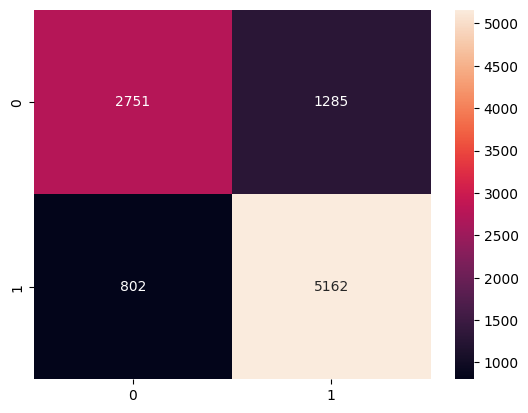

In [55]:
sns.heatmap(confusion_matrix(y_test,log_pred), annot=True, fmt="d")

In [56]:
reviews=['This is an amazing product,I will definetly buy it ',
         'very bad,I dont recommend it at all',
'we received this coffee yesterday, and have to say its amazing',
         'experience was terrible',
         'I will buy again from this site,everything was perfect']
prediction=logistic_pipe.predict(reviews)
sentiment=["Positive" if i == 1 else "Negative" for i in prediction]
# Predicted : P,N,P,N,P    2 errors
print(sentiment)

['Negative', 'Negative', 'Positive', 'Negative', 'Positive']


Naive Bayes

              precision    recall  f1-score   support

           0     0.8414    0.3679    0.5120      4036
           1     0.6902    0.9531    0.8006      5964

    accuracy                         0.7169     10000
   macro avg     0.7658    0.6605    0.6563     10000
weighted avg     0.7512    0.7169    0.6841     10000



<Axes: >

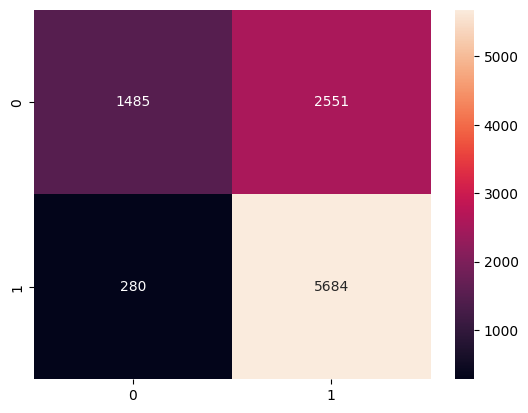

In [57]:
naive_bayes_pipeline = Pipeline([
    ('vec', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

# Train the model
nb_model = naive_bayes_pipeline.fit(X_train, y_train)
y_pred_nb = naive_bayes_pipeline.predict(X_test)
print(classification_report(y_test, y_pred_nb,digits=4))
sns.heatmap(confusion_matrix(y_test,y_pred_nb), annot=True, fmt="d")

In [58]:
print('Training accuracy of Navie Bayes : ', nb_model.score(X_train,y_train))
print('Test accuracy of Navie Bayes : ', nb_model.score(X_test,y_test))

Training accuracy of Navie Bayes :  0.7621
Test accuracy of Navie Bayes :  0.7169


By using the above algorithms Logistic Regression and Naive Bayes we found out that logistic Regression is giving more accuracy which is Training accuracy: 0.82995 and Test accuracy: 0.7913 we can also use other algorithms to compare in future.
